# Plotting time-series


In pandas, we can convert index to DateTime Object in two ways:
1. `pd.read_csv(file_path, index_col='date', parse_dates=True)`
2. `df.index = pd.to_datetime(f.index)`

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# using dates as index, two ways
climate_data = pd.read_csv("data/climate_change.csv", index_col='date', parse_dates=True)
climate_data.index = pd.to_datetime(climate_data.index)

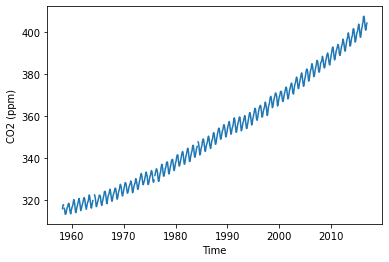

In [11]:
fig, ax = plt.subplots()

ax.plot(climate_data.index, climate_data['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

#### Slicing with Time

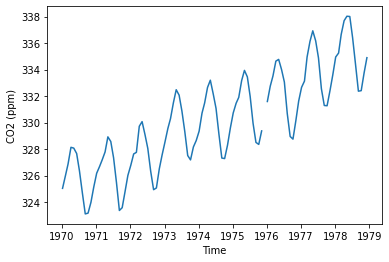

In [13]:

seventies = climate_data['1970-01-01':'1978-12-31']
fig, ax = plt.subplots()

ax.plot(seventies.index, seventies['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

## Plotting time-series with different variables


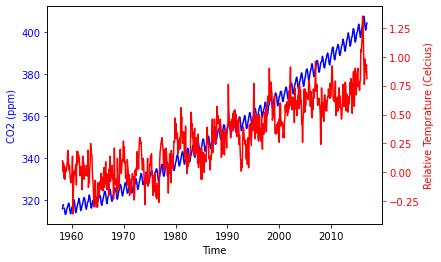

In [22]:
fig, ax = plt.subplots()

ax.plot(climate_data.index, climate_data['co2'], color='b')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='b')

ax.tick_params('y', colors='b')

ax = plt.twinx()
ax.plot(climate_data.index, climate_data['relative_temp'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('Relative Temprature (Celcius)', color='r')

ax.tick_params('y', colors='r')

#### Generlizing it with Functions

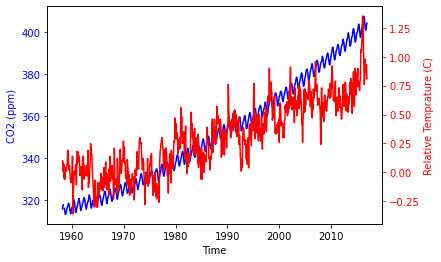

In [29]:
def plot_timeseries(axes, x, y, xlabel, ylabel, color):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)
    
fig, ax = plt.subplots()
plot_timeseries(ax, climate_data.index, climate_data['co2'], 'Time', 'CO2 (ppm)', color='b')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_data.index, climate_data['relative_temp'], 'Time', 'Relative Temprature (C)', color='r')


## Annotating Time Series 
- draswing an arrow or showing a text on the plot to draw attention 

Text(2008-10-06 00:00:00, -0.2, '>1 degreee')

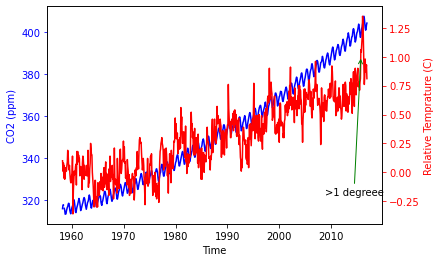

In [37]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_data.index, climate_data['co2'], 'Time', 'CO2 (ppm)', color='b')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_data.index, climate_data['relative_temp'], 'Time', 'Relative Temprature (C)', color='r')

ax2.annotate(">1 degreee", xy=(pd.Timestamp("2015-10-06"), 1),
            xytext=(pd.Timestamp('2008-10-06'),-0.2), 
            arrowprops={'arrowstyle':'->', 'color':'green'})